<a href="https://colab.research.google.com/github/Fonseca-BrunoC/Estudo-python/blob/main/Regress%C3%A3o_linear_melhorada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

Na parte das médias eu deixei o código que eu tinha usado no programa que eu fiz o MMQ, mas percebi poderia simplesmente ter criado uma lista para cada uma das ABS, unido elas em uma única lista e então fazer o np.mean().

In [ ]:
#Importando dados
df = pd.read_csv("/content/data2.csv") 
print(df)
data = df.to_numpy() #transformando os dados em numpy

#Criando uma lista para as médias
AbsM = np.array([])
#Criando uma lista para o desvio padrão
Sigma = np.array([])
k = 0
for i in data: 
  M = np.mean(data[k,:3]) #Fazendo as médias das abs
  s = np.std(data[k,:3]) #calculando o desvio padrão
  AbsM = np.append(AbsM, M)
  AbsM = AbsM.round(3) #diminuindo as casas decimais
  Sigma = np.append(Sigma, s)
  Sigma = Sigma.round(3) #diminuindo as casas decimais
  k = k + 1

#Criando uma lista para os valores de concentração
Conc = np.array([]) 
k2 = 0
for i in data:
  c = data[k2,3]
  Conc = np.append(Conc, c)
  k2 = k2 + 1

dados = np.column_stack((AbsM, Conc)) #criando a matriz de dados
print(dados)

y = dados[:,0]
x = dados[:,1]

     Abs   Abs 2   Abs3   C(mg/L)
0  0.000   0.000  0.000         0
1  0.315   0.322  0.341       200
2  0.605   0.631  0.610       400
3  0.920   0.915  0.923       600
4  1.245   1.228  1.235       800
[[0.000e+00 0.000e+00]
 [3.260e-01 2.000e+02]
 [6.150e-01 4.000e+02]
 [9.190e-01 6.000e+02]
 [1.236e+00 8.000e+02]]


In [ ]:
#Definindo o intervalo de confiança
media, sigma = AbsM, Sigma
conf_int = stats.norm.interval(0.95, loc=media, scale=sigma)
menor = np.array(conf_int[0])
maior = np.array(conf_int[1])

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [ ]:
#Criando o modelo linear
mod_linear = np.polyfit(x, y, 1)

#Definindo os coeficientes da reta
a = float(mod_linear[0])
b = float(mod_linear[1])

print(f"Coeficiente angular: {a:.5f}")
print(f"Coeficiente linear: {b:0.5f}")

y_mod = (a * x) + b

Coeficiente angular: 0.00153
Coeficiente linear: 0.00620


In [ ]:
#Calculando o coeficiente de determinação
yresid = y - y_mod
SQresid = sum(yresid**2)
y_tot = y - np.mean(y)
SQtotal = sum(y_tot**2)
R2 = 1 - SQresid/SQtotal
print('O coeficiente de determinação é {:.4f}'.format(R2))

O coeficiente de determinação é 0.9997


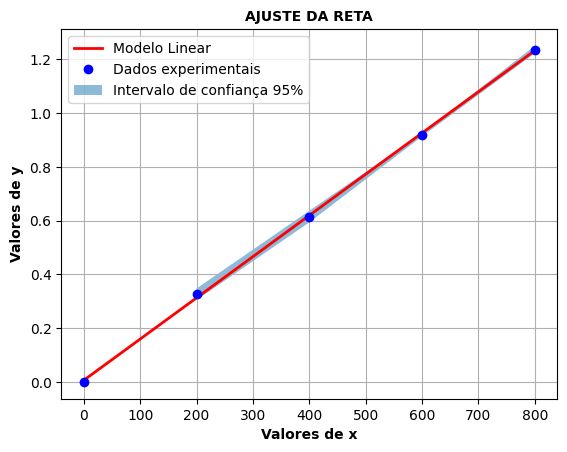

In [ ]:
#Plotando o gráfico da reta

SMALL_SIZE = 10                        
MEDIUM_SIZE = 15                       
BIGGER_SIZE = 15   
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=SMALL_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)


f = plt.figure()     
ax = f.add_subplot(111)     
lns1 = ax.plot(x,y_mod,'red',linewidth=2,label='Modelo Linear')                                           
lns2 = ax.plot(x,y,'o', color = 'blue', label='Dados experimentais') 
ax.fill_between(x, menor, maior, alpha=0.5, label = 'Intervalo de confiança 95%')    
ax.set_title("AJUSTE DA RETA", weight ='bold')  
ax.set_xlabel('Valores de x',weight='bold')               
ax.set_ylabel('Valores de y', weight='bold')
ax.grid(True)                                                   
ax.legend(loc=0)                                                   
f.patch.set_facecolor('white')                                       
plt.style.use('default') 
plt.savefig('Linearizacao.png', dpi=400)  
plt.show()

In [ ]:
#Salvando os resultados no Excel
df_concents= pd.DataFrame({'Valores de x': x, 'Valores de y_meida':AbsM, 'y do modelo':y_mod, 'coeficiente angular':mod_linear[0], 'coeficiente linear':mod_linear[1]})
with pd.ExcelWriter('Saída_de_dados_linear.xlsx') as writer:
    df_concents.to_excel(writer, sheet_name="Output_concent")
    writer.save()